In [1]:
# importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the training dataset
train_data = pd.read_csv('train_Df64byy.csv')

#Print the first 5 rows of the dataframe.
train_data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [3]:
#Loading the test dataset
test_data = pd.read_csv('test_YCcRUnU.csv')

#Print the first 5 rows of the dataframe.
test_data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


Basic EDA and statistical analysis

In [4]:
#Extract information about the training data types,columns, null value counts, memory usage etc

train_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [5]:
#Extract basic statistic details about the training data 

train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,50882.0,25441.500000,14688.512535,1.0,12721.25,25441.5,38161.75,50882.0
Region_Code,50882.0,1732.788707,1424.081652,1.0,523.00,1391.0,2667.00,6194.0
Upper_Age,50882.0,44.856275,17.310271,18.0,28.00,44.0,59.00,75.0
Lower_Age,50882.0,42.738866,17.319375,16.0,27.00,40.0,57.00,75.0
Holding_Policy_Type,30631.0,2.439228,1.025923,1.0,1.00,3.0,3.00,4.0
Reco_Policy_Cat,50882.0,15.115188,6.340663,1.0,12.00,17.0,20.00,22.0
Reco_Policy_Premium,50882.0,14183.950069,6590.074873,2280.0,9248.00,13178.0,18096.00,43350.4
Response,50882.0,0.239947,0.427055,0.0,0.00,0.0,0.00,1.0


In [6]:
#Extract basic statistic details about the test data (note only numerical columns would be displayed here unless parameter include="all")

test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,21805.0,61785.000000,6294.705646,50883.0,56334.0,61785.0,67236.0,72687.0
Region_Code,21805.0,1748.737491,1438.358949,1.0,535.0,1392.0,2712.0,6185.0
Upper_Age,21805.0,44.877734,17.254898,18.0,28.0,44.0,59.0,75.0
Lower_Age,21805.0,42.748085,17.269112,16.0,27.0,41.0,57.0,75.0
Holding_Policy_Type,13202.0,2.440085,1.037627,1.0,1.0,3.0,3.0,4.0
Reco_Policy_Cat,21805.0,15.138363,6.302805,1.0,12.0,17.0,20.0,22.0
Reco_Policy_Premium,21805.0,14220.306581,6497.996164,2152.0,9285.0,13244.0,18201.6,43776.0


In [7]:
#Creating the copy of the training dataset
train_data_copy = train_data.copy(deep = True)

#Showing the count of Nans
print(train_data_copy.isnull().sum())

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64


In [8]:
#Creating the copy of the test dataset
test_data_copy = test_data.copy(deep = True)

#Showing the count of Nans
print(test_data_copy.isnull().sum())

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64


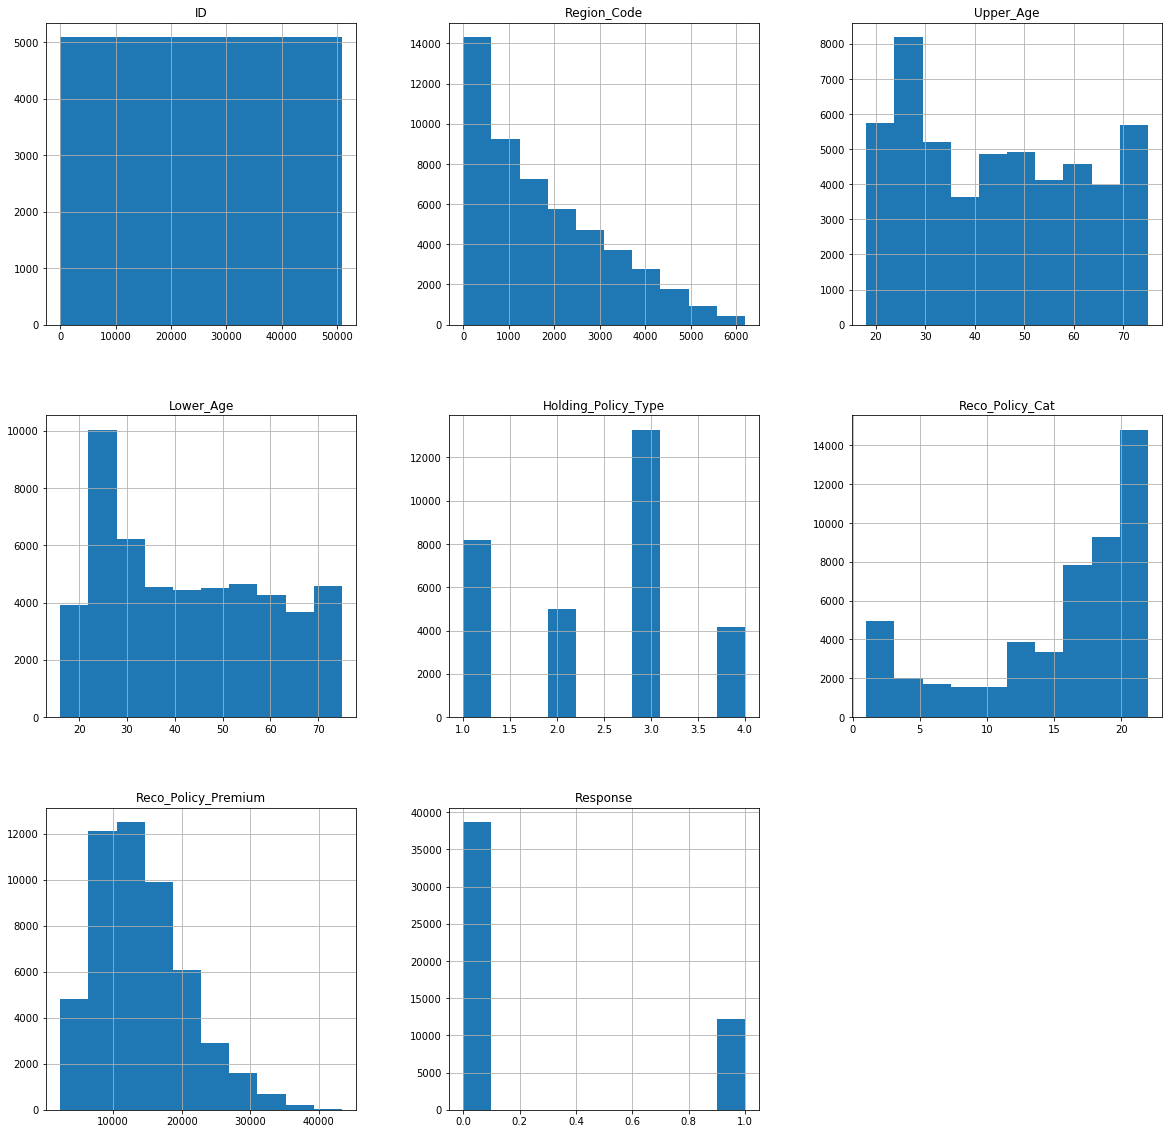

In [9]:
#To fill these Nan values the training data distribution needs to be understood

p = train_data_copy.hist(figsize = (20,20))

In [10]:
#To impute nan values for the columns in accordance with their distribution

train_data_copy['Holding_Policy_Type'].fillna(train_data_copy['Holding_Policy_Type'].mean(), inplace = True)
train_data_copy.isna().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type            0
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

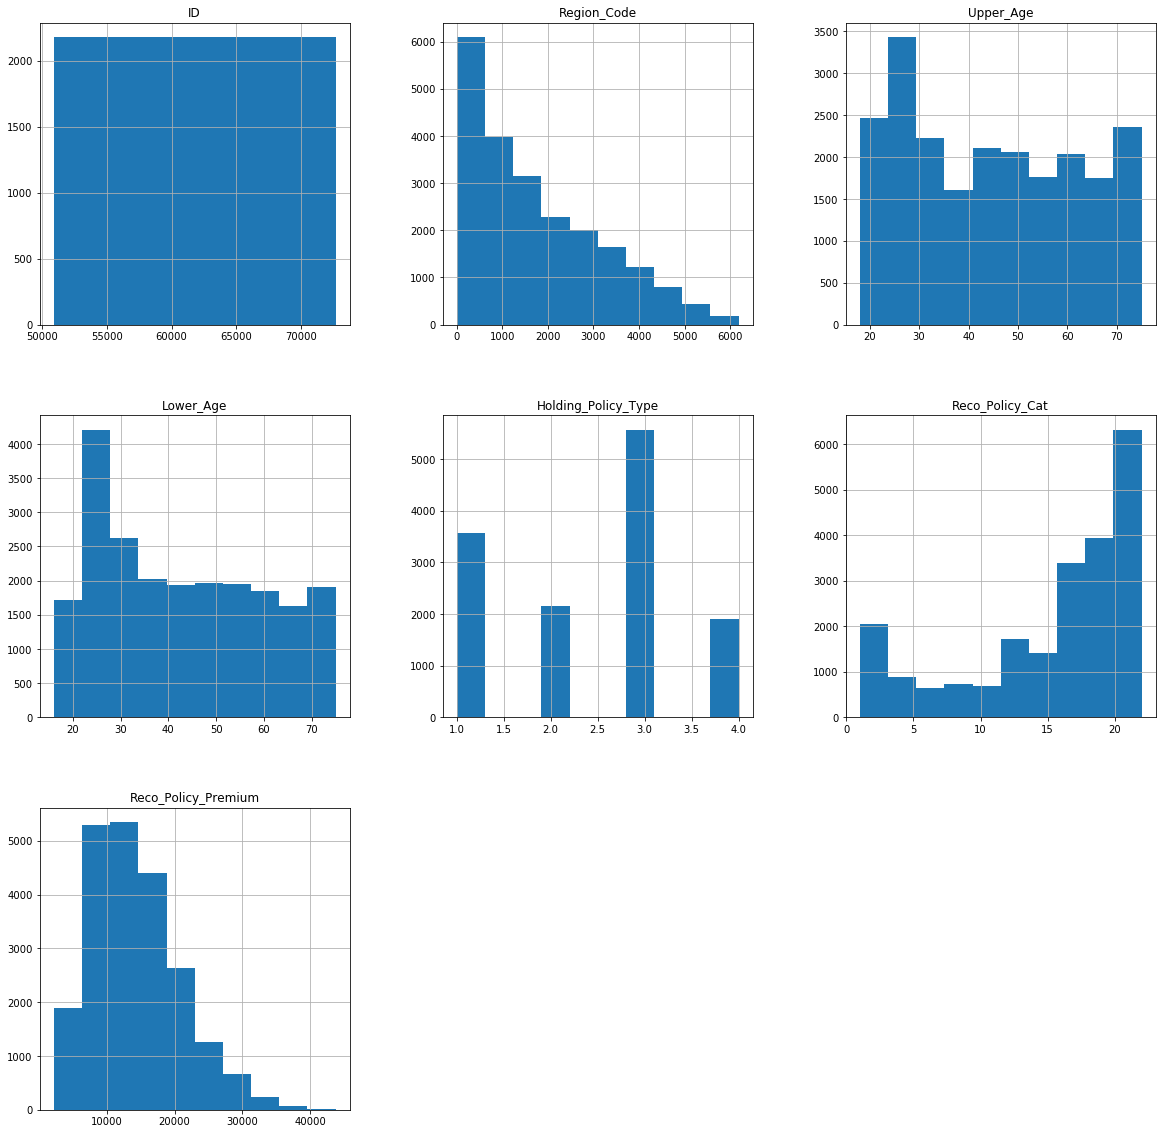

In [11]:
#To fill these Nan values the test data distribution needs to be understood

p = test_data_copy.hist(figsize = (20,20))

In [12]:
#To impute nan values for the columns in accordance with their distribution

test_data_copy['Holding_Policy_Type'].fillna(test_data_copy['Holding_Policy_Type'].mean(), inplace = True)
test_data_copy.isna().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type           0
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

In [13]:
#Applying bfill() method to fill the missing values in training dataset

train_data_copy.bfill(axis = 0, inplace=True) 

In [14]:
#To check if training dataset contains any null values after filling the missing values

train_data_copy.isna().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

In [15]:
# applying ffill() method to fill the missing values in training dataset

test_data_copy.bfill(axis = 0, inplace=True) 

In [16]:
#To check if test dataset contains any null values after filling the missing values

test_data_copy.isna().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
dtype: int64

In [17]:
#Inspecting the training dataset after filling missing values

train_data_copy

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.000000,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,1.0,2.439228,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,X1,1.0,1.000000,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.000000,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.000000,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,7.0,2.439228,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.000000,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.000000,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.000000,16,28179.2,1


In [18]:
#Inspecting the test dataset after filling missing values

test_data_copy

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,X1,6.0,3.000000,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.000000,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.000000,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.000000,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,14+,2.440085,5,22534.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,72683,C3,1044,Owned,Individual,45,45,No,X1,4.0,1.000000,18,15884.0
21801,72684,C4,266,Owned,Individual,59,59,No,X5,6.0,3.000000,18,21390.0
21802,72685,C12,2470,Owned,Individual,74,74,No,X3,3.0,2.440085,1,17836.0
21803,72686,C10,1676,Rented,Individual,25,25,No,X4,3.0,1.000000,19,11568.0


In [19]:


pip install missingno

Note: you may need to restart the kernel to use updated packages.


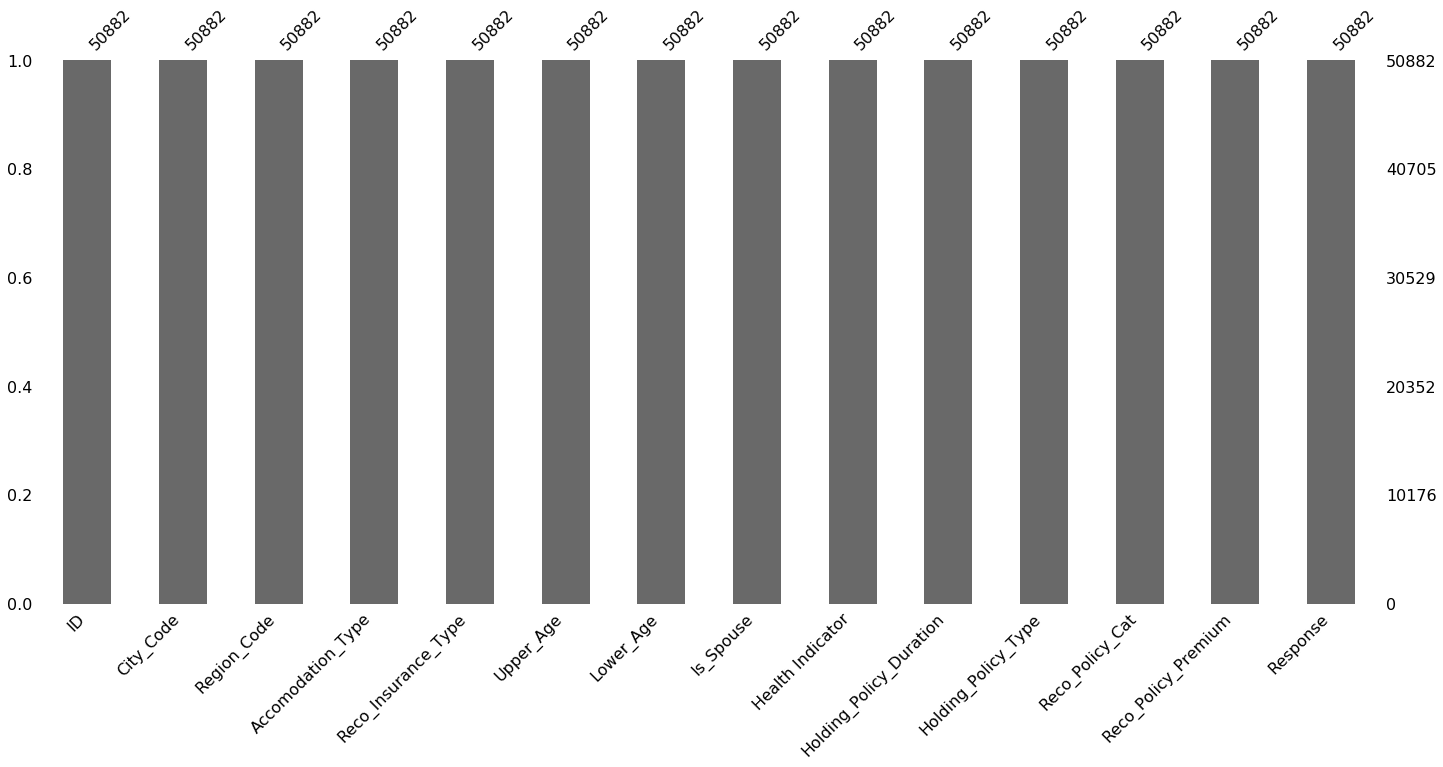

In [20]:
#Null count analysis of training dataset

import missingno as msno
p=msno.bar(train_data_copy)

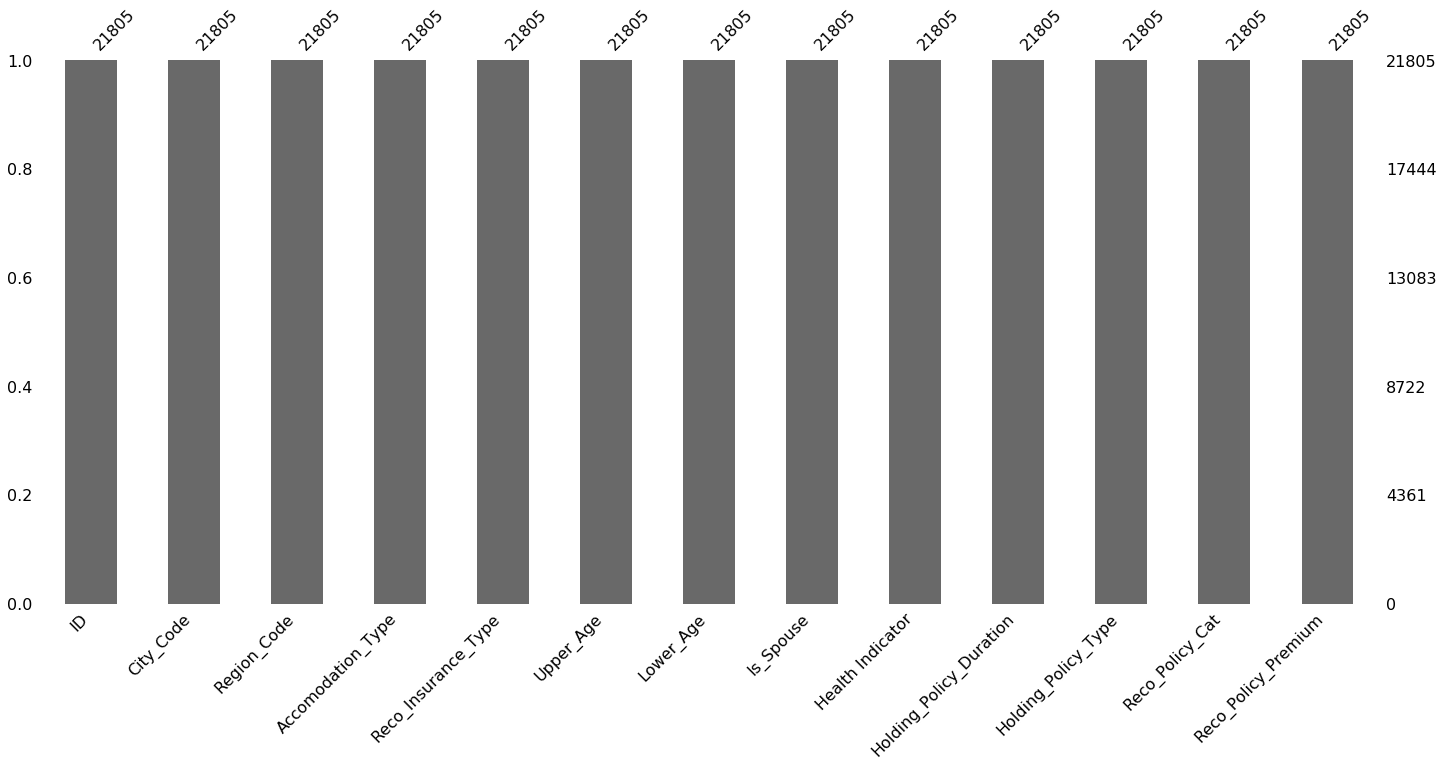

In [21]:
#Null count analysis of test dataset

import missingno as msno
p=msno.bar(test_data_copy)

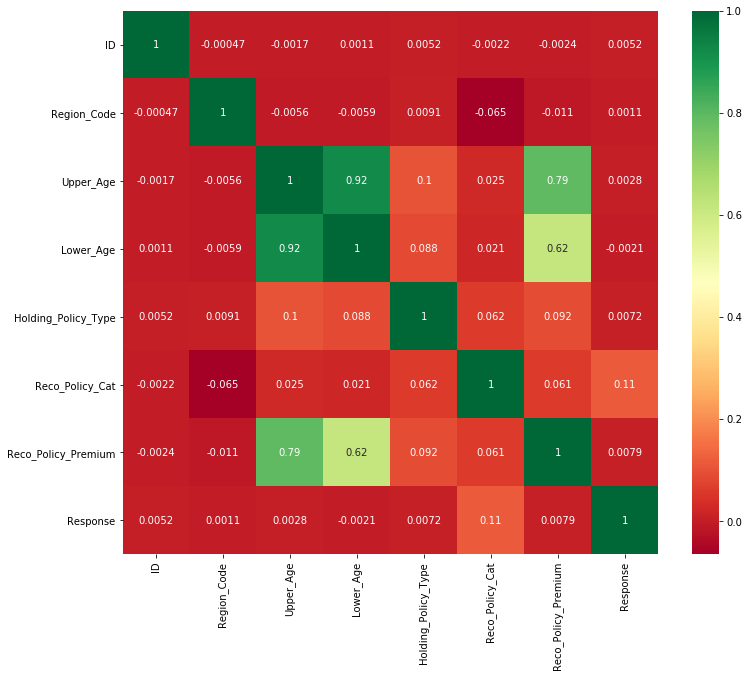

In [22]:
#Plotting Heatmap to check the correlation among independent variables in training dataset

plt.figure(figsize=(12,10))
p=sns.heatmap(train_data_copy.corr(), annot=True,cmap ='RdYlGn')

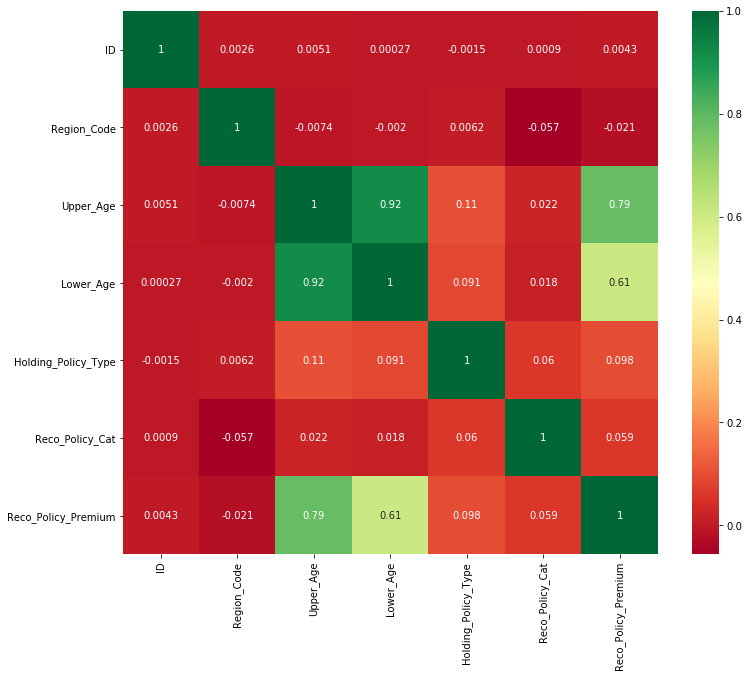

In [23]:
#Plotting Heatmap to check the correlation among independent variables in test dataset


plt.figure(figsize=(12,10))
p=sns.heatmap(test_data_copy.corr(), annot=True,cmap ='RdYlGn')

In [24]:
#Droping Upper age from training dataset as it is highly correlated to Lower age.

train_data_copy.drop(columns=['Upper_Age'],axis=1,inplace=True)

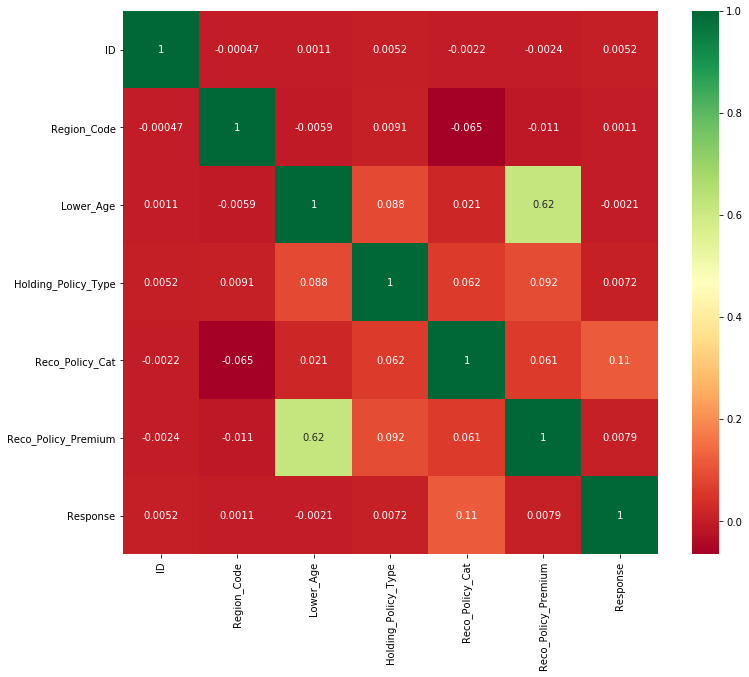

In [25]:
#Plotting Heatmap after removing highly corelated columns in training dataset


plt.figure(figsize=(12,10))
p=sns.heatmap(train_data_copy.corr(), annot=True,cmap ='RdYlGn')

In [26]:
#Droping Upper age from test dataset as it is highly correlated to Lower age.

test_data_copy.drop(columns=['Upper_Age'],axis=1,inplace=True)

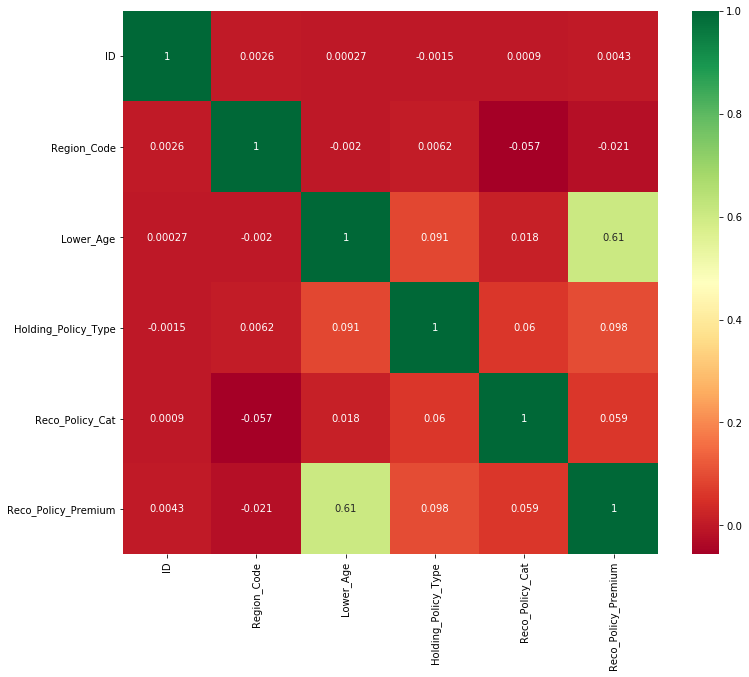

In [27]:
#Plotting Heatmap after removing highly corelated columns in test dataset

plt.figure(figsize=(12,10))
p=sns.heatmap(test_data_copy.corr(), annot=True,cmap ='RdYlGn')

In [28]:
#Printing columns in training dataset after removing Upper age column

cols=train_data_copy.columns
cols

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Lower_Age', 'Is_Spouse', 'Health Indicator',
       'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat',
       'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [29]:
#Printing Unique values in each cplumn in training dataset

for i in cols:
    print("Unique Values in Column:",i)
    print(train_data_copy[i].value_counts().unique)
    print("________________________________________________________")
    print("\n")

Unique Values in Column: ID
<bound method Series.unique of 2049     1
46396    1
42302    1
44351    1
21856    1
        ..
31386    1
29339    1
19100    1
17053    1
2047     1
Name: ID, Length: 50882, dtype: int64>
________________________________________________________


Unique Values in Column: City_Code
<bound method Series.unique of C1     8973
C2     7747
C3     4889
C4     3671
C9     2185
C6     1950
C7     1910
C8     1806
C10    1611
C5     1364
C15    1186
C17    1159
C11    1147
C16    1135
C13    1005
C20     926
C19     899
C12     868
C18     797
C14     746
C21     679
C23     587
C24     553
C22     516
C26     499
C29     387
C25     366
C27     295
C33     286
C28     285
C32     160
C34     130
C30      58
C35      56
C36      36
C31      15
Name: City_Code, dtype: int64>
________________________________________________________


Unique Values in Column: Region_Code
<bound method Series.unique of 1       96
5       75
2       73
6       73
4       73
        ..


In [30]:
#Printing columns in test dataset after removing Upper age column

col=test_data_copy.columns
col

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Lower_Age', 'Is_Spouse', 'Health Indicator',
       'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat',
       'Reco_Policy_Premium'],
      dtype='object')

In [31]:
#Printing Unique values in each cplumn in test dataset

for i in col:
    print("Unique Values in Column:",i)
    print(test_data_copy[i].value_counts().unique)
    print("________________________________________________________")
    print("\n")

Unique Values in Column: ID
<bound method Series.unique of 65536    1
62788    1
56657    1
54608    1
68939    1
        ..
66197    1
68244    1
53903    1
55950    1
67583    1
Name: ID, Length: 21805, dtype: int64>
________________________________________________________


Unique Values in Column: City_Code
<bound method Series.unique of C1     3789
C2     3331
C3     2065
C4     1559
C9      904
C6      819
C7      788
C8      773
C10     680
C5      599
C17     530
C11     514
C16     478
C15     477
C20     444
C12     442
C13     424
C19     365
C14     343
C18     334
C21     305
C24     270
C23     255
C26     232
C22     197
C25     170
C29     146
C27     142
C28     109
C33     106
C32      80
C34      59
C35      33
C30      23
C36      18
C31       2
Name: City_Code, dtype: int64>
________________________________________________________


Unique Values in Column: Region_Code
<bound method Series.unique of 1       44
2       39
7       35
26      33
40      31
        ..


In [32]:
# function to encode City_Code

dict_City_Code ={}
count = 1
for i in train_data_copy.City_Code.unique():
    dict_City_Code[i] = count
    count +=1
    
dict_City_Code

{'C3': 1,
 'C5': 2,
 'C24': 3,
 'C8': 4,
 'C9': 5,
 'C1': 6,
 'C15': 7,
 'C28': 8,
 'C27': 9,
 'C7': 10,
 'C20': 11,
 'C25': 12,
 'C4': 13,
 'C2': 14,
 'C34': 15,
 'C10': 16,
 'C17': 17,
 'C18': 18,
 'C16': 19,
 'C29': 20,
 'C33': 21,
 'C26': 22,
 'C19': 23,
 'C6': 24,
 'C12': 25,
 'C13': 26,
 'C11': 27,
 'C14': 28,
 'C22': 29,
 'C23': 30,
 'C21': 31,
 'C36': 32,
 'C32': 33,
 'C30': 34,
 'C35': 35,
 'C31': 36}

In [33]:
# function to encode City_Code

dict_Health_Indicator ={}
count = 1
for i in train_data_copy['Health Indicator'].unique():
    dict_Health_Indicator[i] = count
    count +=1
    
dict_Health_Indicator

{'X1': 1,
 'X2': 2,
 'X4': 3,
 'X3': 4,
 'X6': 5,
 'X5': 6,
 'X8': 7,
 'X7': 8,
 'X9': 9}

In [34]:
# function to encode City_Code

dict_Holding_Policy_Duration ={}
count = 1
for i in train_data_copy.Holding_Policy_Duration.unique():
    dict_Holding_Policy_Duration[i] = count
    count +=1
    
dict_Holding_Policy_Duration

{'14+': 1,
 '1.0': 2,
 '3.0': 3,
 '5.0': 4,
 '9.0': 5,
 '14.0': 6,
 '7.0': 7,
 '2.0': 8,
 '11.0': 9,
 '10.0': 10,
 '8.0': 11,
 '6.0': 12,
 '4.0': 13,
 '13.0': 14,
 '12.0': 15}

In [35]:
#Replacing values in respective columns with encoded values in training dataset

train_data_copy['City_Code'] = train_data_copy['City_Code'].map(dict_City_Code)
train_data_copy['Health Indicator'] = train_data_copy['Health Indicator'].map(dict_Health_Indicator)
train_data_copy['Holding_Policy_Duration'] = train_data_copy['Holding_Policy_Duration'].map(dict_Holding_Policy_Duration)

In [36]:
#Inspecting encoded values in the training dataset

train_data_copy

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,1,3213,Rented,Individual,36,No,1,1,3.000000,22,11628.0,0
1,2,2,1117,Owned,Joint,22,No,2,2,2.439228,22,30510.0,0
2,3,2,3732,Owned,Individual,32,No,1,2,1.000000,19,7450.0,1
3,4,3,4378,Owned,Joint,48,No,1,1,3.000000,19,17780.0,0
4,5,4,2190,Rented,Individual,44,No,2,3,1.000000,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,13,845,Rented,Individual,22,No,4,7,2.439228,18,7704.0,0
50878,50879,2,4188,Rented,Individual,27,No,4,7,3.000000,4,5408.0,0
50879,50880,6,442,Rented,Individual,63,No,2,1,1.000000,12,11374.0,0
50880,50881,6,4,Owned,Joint,49,No,2,8,2.000000,16,28179.2,1


In [37]:
# function to encode City_Code

dict_City_Code_test ={}
count = 1
for i in test_data_copy.City_Code.unique():
    dict_City_Code_test[i] = count
    count +=1
    
dict_City_Code_test

{'C1': 1,
 'C4': 2,
 'C3': 3,
 'C2': 4,
 'C13': 5,
 'C18': 6,
 'C16': 7,
 'C17': 8,
 'C11': 9,
 'C7': 10,
 'C21': 11,
 'C34': 12,
 'C14': 13,
 'C8': 14,
 'C12': 15,
 'C6': 16,
 'C10': 17,
 'C9': 18,
 'C23': 19,
 'C32': 20,
 'C26': 21,
 'C15': 22,
 'C24': 23,
 'C20': 24,
 'C19': 25,
 'C5': 26,
 'C28': 27,
 'C30': 28,
 'C25': 29,
 'C29': 30,
 'C27': 31,
 'C33': 32,
 'C22': 33,
 'C36': 34,
 'C35': 35,
 'C31': 36}

In [38]:
# function to encode City_Code

dict_Health_Indicator_test ={}
count = 1
for i in test_data_copy['Health Indicator'].unique():
    dict_Health_Indicator_test[i] = count
    count +=1
    
dict_Health_Indicator_test

{'X1': 1,
 'X3': 2,
 'X2': 3,
 'X5': 4,
 'X4': 5,
 'X7': 6,
 'X6': 7,
 'X9': 8,
 'X8': 9}

In [39]:
# function to encode City_Code

dict_Holding_Policy_Duration_test ={}
count = 1
for i in test_data_copy.Holding_Policy_Duration.unique():
    dict_Holding_Policy_Duration_test[i] = count
    count +=1
    
dict_Holding_Policy_Duration_test

{'6.0': 1,
 '3.0': 2,
 '2.0': 3,
 '14+': 4,
 '5.0': 5,
 '1.0': 6,
 '4.0': 7,
 '12.0': 8,
 '11.0': 9,
 '7.0': 10,
 '9.0': 11,
 '13.0': 12,
 '8.0': 13,
 '14.0': 14,
 '10.0': 15}

In [40]:
#Replacing values in respective columns with encoded values in test dataset

test_data_copy['City_Code'] = test_data_copy['City_Code'].map(dict_City_Code_test)
test_data_copy['Health Indicator'] = test_data_copy['Health Indicator'].map(dict_Health_Indicator_test)
test_data_copy['Holding_Policy_Duration'] = test_data_copy['Holding_Policy_Duration'].map(dict_Holding_Policy_Duration_test)

In [41]:
#Inspecting encoded values in the test dataset

test_data_copy

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,1,156,Owned,Individual,30,No,1,1,3.000000,5,11934.0
1,50884,2,7,Owned,Joint,68,Yes,1,2,3.000000,18,32204.8
2,50885,1,564,Rented,Individual,28,No,2,3,4.000000,17,9240.0
3,50886,3,1177,Rented,Individual,23,No,2,2,3.000000,18,9086.0
4,50887,1,951,Owned,Individual,75,No,2,4,2.440085,5,22534.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21800,72683,3,1044,Owned,Individual,45,No,1,7,1.000000,18,15884.0
21801,72684,2,266,Owned,Individual,59,No,4,1,3.000000,18,21390.0
21802,72685,15,2470,Owned,Individual,74,No,2,2,2.440085,1,17836.0
21803,72686,17,1676,Rented,Individual,25,No,5,2,1.000000,19,11568.0


In [42]:
#Creating dummy variables in training dataset

train_data_copy=pd.get_dummies(train_data_copy)

In [43]:
#Inspecting training dataset after creating dummy variables

train_data_copy

,ID,City_Code,Region_Code,Lower_Age,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Accomodation_Type_Owned,Accomodation_Type_Rented,Reco_Insurance_Type_Individual,Reco_Insurance_Type_Joint,Is_Spouse_No,Is_Spouse_Yes
0,1,1,3213,36,1,1,3.000000,22,11628.0,0,0,1,1,0,1,0
1,2,2,1117,22,2,2,2.439228,22,30510.0,0,1,0,0,1,1,0
2,3,2,3732,32,1,2,1.000000,19,7450.0,1,1,0,1,0,1,0
3,4,3,4378,48,1,1,3.000000,19,17780.0,0,1,0,0,1,1,0
4,5,4,2190,44,2,3,1.000000,16,10404.0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,13,845,22,4,7,2.439228,18,7704.0,0,0,1,1,0,1,0
50878,50879,2,4188,27,4,7,3.000000,4,5408.0,0,0,1,1,0,1,0
50879,50880,6,442,63,2,1,1.000000,12,11374.0,0,0,1,1,0,1,0
50880,50881,6,4,49,2,8,2.000000,16,28179.2,1,1,0,0,1,1,0


In [44]:
#Printing column names after creating dummy variables in training dataset

train_data_copy.columns

Index(['ID', 'City_Code', 'Region_Code', 'Lower_Age', 'Health Indicator',
       'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat',
       'Reco_Policy_Premium', 'Response', 'Accomodation_Type_Owned',
       'Accomodation_Type_Rented', 'Reco_Insurance_Type_Individual',
       'Reco_Insurance_Type_Joint', 'Is_Spouse_No', 'Is_Spouse_Yes'],
      dtype='object')

In [45]:
#Droping Columns in training dataset to avoid Dummy variable trap

train_data_copy.drop(columns=['Accomodation_Type_Rented','Reco_Insurance_Type_Joint','Is_Spouse_Yes'],axis=1,inplace=True)

In [46]:
#Inspect traing dataset after droping columns to avoid Dummy variable trap

train_data_copy

,ID,City_Code,Region_Code,Lower_Age,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Accomodation_Type_Owned,Reco_Insurance_Type_Individual,Is_Spouse_No
0,1,1,3213,36,1,1,3.000000,22,11628.0,0,0,1,1
1,2,2,1117,22,2,2,2.439228,22,30510.0,0,1,0,1
2,3,2,3732,32,1,2,1.000000,19,7450.0,1,1,1,1
3,4,3,4378,48,1,1,3.000000,19,17780.0,0,1,0,1
4,5,4,2190,44,2,3,1.000000,16,10404.0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,13,845,22,4,7,2.439228,18,7704.0,0,0,1,1
50878,50879,2,4188,27,4,7,3.000000,4,5408.0,0,0,1,1
50879,50880,6,442,63,2,1,1.000000,12,11374.0,0,0,1,1
50880,50881,6,4,49,2,8,2.000000,16,28179.2,1,1,0,1


In [47]:
#Renaming the columns in training dataset

train_data_copy.rename(columns={'Accomodation_Type_Owned': 'Accomodation_Type', 'Reco_Insurance_Type_Individual': 'Reco_Insurance_Type', 'Is_Spouse_No':'Is_Spouse'}, inplace=True)

In [48]:
#Inspect the training dataset after Renaming the columns in training dataset

train_data_copy

,ID,City_Code,Region_Code,Lower_Age,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Accomodation_Type,Reco_Insurance_Type,Is_Spouse
0,1,1,3213,36,1,1,3.000000,22,11628.0,0,0,1,1
1,2,2,1117,22,2,2,2.439228,22,30510.0,0,1,0,1
2,3,2,3732,32,1,2,1.000000,19,7450.0,1,1,1,1
3,4,3,4378,48,1,1,3.000000,19,17780.0,0,1,0,1
4,5,4,2190,44,2,3,1.000000,16,10404.0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,13,845,22,4,7,2.439228,18,7704.0,0,0,1,1
50878,50879,2,4188,27,4,7,3.000000,4,5408.0,0,0,1,1
50879,50880,6,442,63,2,1,1.000000,12,11374.0,0,0,1,1
50880,50881,6,4,49,2,8,2.000000,16,28179.2,1,1,0,1


In [49]:
#Creating dummy variables in test dataset

test_data_copy=pd.get_dummies(test_data_copy)

In [50]:
#Inspecting test dataset after creating dummy variables

test_data_copy

,ID,City_Code,Region_Code,Lower_Age,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Accomodation_Type_Owned,Accomodation_Type_Rented,Reco_Insurance_Type_Individual,Reco_Insurance_Type_Joint,Is_Spouse_No,Is_Spouse_Yes
0,50883,1,156,30,1,1,3.000000,5,11934.0,1,0,1,0,1,0
1,50884,2,7,68,1,2,3.000000,18,32204.8,1,0,0,1,0,1
2,50885,1,564,28,2,3,4.000000,17,9240.0,0,1,1,0,1,0
3,50886,3,1177,23,2,2,3.000000,18,9086.0,0,1,1,0,1,0
4,50887,1,951,75,2,4,2.440085,5,22534.0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,72683,3,1044,45,1,7,1.000000,18,15884.0,1,0,1,0,1,0
21801,72684,2,266,59,4,1,3.000000,18,21390.0,1,0,1,0,1,0
21802,72685,15,2470,74,2,2,2.440085,1,17836.0,1,0,1,0,1,0
21803,72686,17,1676,25,5,2,1.000000,19,11568.0,0,1,1,0,1,0


In [51]:
#Printing column names after creating dummy variables in test dataset

test_data_copy.columns

Index(['ID', 'City_Code', 'Region_Code', 'Lower_Age', 'Health Indicator',
       'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat',
       'Reco_Policy_Premium', 'Accomodation_Type_Owned',
       'Accomodation_Type_Rented', 'Reco_Insurance_Type_Individual',
       'Reco_Insurance_Type_Joint', 'Is_Spouse_No', 'Is_Spouse_Yes'],
      dtype='object')

In [52]:
#Droping Columns in test dataset to avoid Dummy variable trap

test_data_copy.drop(columns=['Accomodation_Type_Rented','Reco_Insurance_Type_Joint','Is_Spouse_Yes'],axis=1,inplace=True)

In [53]:
#Inspect traing dataset after droping columns to avoid Dummy variable trap

test_data_copy

,ID,City_Code,Region_Code,Lower_Age,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Accomodation_Type_Owned,Reco_Insurance_Type_Individual,Is_Spouse_No
0,50883,1,156,30,1,1,3.000000,5,11934.0,1,1,1
1,50884,2,7,68,1,2,3.000000,18,32204.8,1,0,0
2,50885,1,564,28,2,3,4.000000,17,9240.0,0,1,1
3,50886,3,1177,23,2,2,3.000000,18,9086.0,0,1,1
4,50887,1,951,75,2,4,2.440085,5,22534.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
21800,72683,3,1044,45,1,7,1.000000,18,15884.0,1,1,1
21801,72684,2,266,59,4,1,3.000000,18,21390.0,1,1,1
21802,72685,15,2470,74,2,2,2.440085,1,17836.0,1,1,1
21803,72686,17,1676,25,5,2,1.000000,19,11568.0,0,1,1


In [54]:
#Renaming the columns in test dataset

test_data_copy.rename(columns={'Accomodation_Type_Owned': 'Accomodation_Type', 'Reco_Insurance_Type_Individual': 'Reco_Insurance_Type', 'Is_Spouse_No':'Is_Spouse'}, inplace=True)

In [55]:
#Inspect the training dataset after Renaming the columns in test dataset

test_data_copy

,ID,City_Code,Region_Code,Lower_Age,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Accomodation_Type,Reco_Insurance_Type,Is_Spouse
0,50883,1,156,30,1,1,3.000000,5,11934.0,1,1,1
1,50884,2,7,68,1,2,3.000000,18,32204.8,1,0,0
2,50885,1,564,28,2,3,4.000000,17,9240.0,0,1,1
3,50886,3,1177,23,2,2,3.000000,18,9086.0,0,1,1
4,50887,1,951,75,2,4,2.440085,5,22534.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
21800,72683,3,1044,45,1,7,1.000000,18,15884.0,1,1,1
21801,72684,2,266,59,4,1,3.000000,18,21390.0,1,1,1
21802,72685,15,2470,74,2,2,2.440085,1,17836.0,1,1,1
21803,72686,17,1676,25,5,2,1.000000,19,11568.0,0,1,1


In [56]:


pip install --upgrade category_encoders

Note: you may need to restart the kernel to use updated packages.


In [57]:
#import the category encoders library
#import category_encoders as ce

#Create target encoding object
#encoder=ce.TargetEncoder(cols=['Region_Code']) 

#Apply target encoding on column Region_Code
#train_data_copy['Region_Code'] = encoder.fit_transform(train_data_copy['Region_Code'], train_data_copy['Response'])

In [58]:
#Inspecting training dataset after applying target encoding on column Region_Cod

train_data_copy

,ID,City_Code,Region_Code,Lower_Age,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Accomodation_Type,Reco_Insurance_Type,Is_Spouse
0,1,1,3213,36,1,1,3.000000,22,11628.0,0,0,1,1
1,2,2,1117,22,2,2,2.439228,22,30510.0,0,1,0,1
2,3,2,3732,32,1,2,1.000000,19,7450.0,1,1,1,1
3,4,3,4378,48,1,1,3.000000,19,17780.0,0,1,0,1
4,5,4,2190,44,2,3,1.000000,16,10404.0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,13,845,22,4,7,2.439228,18,7704.0,0,0,1,1
50878,50879,2,4188,27,4,7,3.000000,4,5408.0,0,0,1,1
50879,50880,6,442,63,2,1,1.000000,12,11374.0,0,0,1,1
50880,50881,6,4,49,2,8,2.000000,16,28179.2,1,1,0,1


In [59]:
#Checking if any duplicated rows are present in training dataset

train_data_copy.duplicated().sum()

0

In [60]:
#Checking whether given dataset is imbalanced or not. The dataset is imbalanced

train_data_copy['Response'].value_counts().unique

<bound method Series.unique of 0    38673
1    12209
Name: Response, dtype: int64>

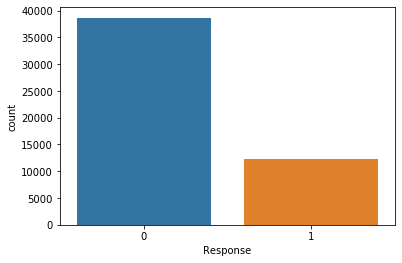

In [61]:
#Visualizing the imbalanced dataset
sns.countplot(x ='Response', data = train_data_copy)
 
# Show the plot
plt.show()

In [62]:
#Creating the training and test dataset

X = train_data_copy.drop(columns=['ID','Response'],axis=1)  #Dropping the 'ID' column as per given instructions and 'Response' column as it is a dependent variable
y = train_data_copy.iloc[:, -1]  #Creating the test dataset

In [63]:
#Splitting the dataset into train and test categories

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/utils/__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/utils/__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current

In [64]:
#Intializing the Random Forest Classifier and applying to predict the result

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(class_weight={0:1,1:3}, n_estimators=10, bootstrap=True, max_depth=10, max_features='auto', min_samples_split=2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

In [65]:
#Printing unique values in y_test

y_test.value_counts().unique

<bound method Series.unique of 1    8493
0    1684
Name: Is_Spouse, dtype: int64>

In [66]:
#Accuracy Measures

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))
print("\n")
print(accuracy_score(y_test, y_pred))

[[1684    0]
 [   0 8493]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1684
           1       1.00      1.00      1.00      8493

    accuracy                           1.00     10177
   macro avg       1.00      1.00      1.00     10177
weighted avg       1.00      1.00      1.00     10177



1.0


In [67]:
#Information about used classifier

classifier

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 3},
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [68]:
#Inspecting the test dataset

X1 = test_data_copy.iloc[:, 1:]   #Droping the 'ID' column as per given instructions

In [69]:
#Predicting the results on test dataset

y_predict = classifier.predict(X1)
y_predict

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


array([1, 0, 1, ..., 1, 1, 1], dtype=uint8)

In [70]:
#Converting the resultant array into dataframe

y_prediction=pd.DataFrame(y_predict)
y_prediction

,0
0,1
1,0
2,1
3,1
4,1
...,...
21800,1
21801,1
21802,1
21803,1


In [71]:
#Printing the ID column in order to concat in resultant dataframe

id=test_data_copy['ID']

In [72]:
#Concating ID with Response

final_results=pd.concat([id,y_prediction],axis=1)

In [73]:
#Renaming the column '0' as Response

final_results.rename(columns = {0:'Response'}, inplace = True)

In [74]:
#Printing the final outputs

final_results

,ID,Response
0,50883,1
1,50884,0
2,50885,1
3,50886,1
4,50887,1
...,...,...
21800,72683,1
21801,72684,1
21802,72685,1
21803,72686,1


In [75]:
#Printing the unique values in the final outputs

final_results['Response'].value_counts().unique

<bound method Series.unique of 1    18227
0     3578
Name: Response, dtype: int64>

In [76]:
#Saving the final outputs to csv file

Results=final_results.to_csv("Submission.csv",header=True,index=False)
Results